In [324]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [325]:
BAN_UNSAM=pd.read_csv('./BrainAgeNeXt/BAN_UNSAM.csv')
BAN_ADNI=pd.read_csv('./BrainAgeNeXt/BAN_ADNI.csv')
BAN_RRIB=pd.read_csv('./BrainAgeNeXt/BAN_RRIB.csv')
BAN_JUK=pd.read_csv('./BrainAgeNeXt/BAN_JUK.csv')

DBN_UNSAM=pd.read_csv('./DeepBrainNet/DBN_UNSAM_BET.csv')
DBN_ADNI=pd.read_csv('./DeepBrainNet/DBN_ADNI_BET.csv')
DBN_RRIB=pd.read_csv('./DeepBrainNet/DBN_RRIB_BET.csv')
DBN_JUK=pd.read_csv('./DeepBrainNet/DBN_JUK_BET.csv')

pyment_UNSAM=pd.read_csv('./pyment/pyment_UNSAM.csv')
pyment_ADNI=pd.read_csv('./pyment/pyment_ADNI.csv')
pyment_RRIB=pd.read_csv('./pyment/pyment_RRIB.csv')
pyment_JUK=pd.read_csv('./pyment/pyment_JUK.csv')

ENIGMA_UNSAM=pd.read_csv('./ENIGMA/ENIGMA_UNSAM.csv')
ENIGMA_ADNI=pd.read_csv('./ENIGMA/ENIGMA_ADNI.csv')
ENIGMA_JUK= pd.read_csv('./ENIGMA/ENIGMA_JUK.csv')
ENIGMA_RRIB=pd.read_csv('./ENIGMA/ENIGMA_RRIB.csv')


BrainAgeNeXt:

In [326]:
#UNSAM-----------------------------------------------------------------------
BAN_UNSAM['mean']=BAN_UNSAM['Edad']+BAN_UNSAM['Predicted_Brain_Age']
BAN_UNSAM['mean']=BAN_UNSAM['mean']/2


mean_diff_BANUNSAM=np.mean(BAN_UNSAM['Error'])
std_diff_BANUNSAM=np.std(BAN_UNSAM['Error'])

#intervalo de confianza del 95%
upper_limit_BANUNSAM = mean_diff_BANUNSAM + 1.96 * std_diff_BANUNSAM
lower_limit_BANUNSAM = mean_diff_BANUNSAM - 1.96 * std_diff_BANUNSAM

#ADNI CN-----------------------------------------------------------------------
BAN_ADNI['mean']=BAN_ADNI['Age']+BAN_ADNI['Predicted_Brain_Age']
BAN_ADNI['mean']=BAN_ADNI['mean']/2

#media y desviación estándar de las diferencias
mean_diff_control_BANADNI=np.mean(BAN_ADNI[BAN_ADNI['Group']=='CN']['Error'])
std_diff_control_BANADNI=np.std(BAN_ADNI[BAN_ADNI['Group']=='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_control_BANADNI = mean_diff_control_BANADNI + 1.96 * std_diff_control_BANADNI
lower_limit_control_BANADNI = mean_diff_control_BANADNI - 1.96 * std_diff_control_BANADNI

#ADNI clinical-----------------------------------------------------------------------
#media y desviación estándar de las diferencias
mean_diff_clinical_BANADNI=np.mean(BAN_ADNI[BAN_ADNI['Group']!='CN']['Error'])
std_diff_clinical_BANADNI=np.std(BAN_ADNI[BAN_ADNI['Group']!='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_clinical_BANADNI = mean_diff_clinical_BANADNI + 1.96 * std_diff_clinical_BANADNI
lower_limit_clinical_BANADNI = mean_diff_clinical_BANADNI - 1.96 * std_diff_clinical_BANADNI

#JUK-----------------------------------------------------------------------
BAN_JUK['mean']=BAN_JUK['age']+BAN_JUK['Predicted_Brain_Age']
BAN_JUK['mean']=BAN_JUK['mean']/2


mean_diff_BANJUK=np.mean(BAN_JUK['Error'])
std_diff_BANJUK=np.std(BAN_JUK['Error'])

#intervalo de confianza del 95%
upper_limit_BANJUK = mean_diff_BANJUK + 1.96 * std_diff_BANJUK
lower_limit_BANJUK = mean_diff_BANJUK - 1.96 * std_diff_BANJUK

#RRIB-----------------------------------------------------------------------
BAN_RRIB['mean']=BAN_RRIB['age']+BAN_RRIB['Predicted_Brain_Age']
BAN_RRIB['mean']=BAN_RRIB['mean']/2

mean_diff_BANRRIB=np.mean(BAN_RRIB['Error'])
std_diff_BANRRIB=np.std(BAN_RRIB['Error'])

#intervalo de confianza del 95%
upper_limit_BANRRIB = mean_diff_BANRRIB + 1.96 * std_diff_BANRRIB
lower_limit_BANRRIB = mean_diff_BANRRIB - 1.96 * std_diff_BANRRIB

In [327]:
# Eliminar nulos
BAN_UNSAM = BAN_UNSAM.dropna(subset=['Error', 'mean'])
BAN_ADNI = BAN_ADNI.dropna(subset=['Error', 'mean'])
BAN_JUK = BAN_JUK.dropna(subset=['Error', 'mean'])
BAN_RRIB = BAN_RRIB.dropna(subset=['Error', 'mean'])

# Regressión BAN_UNSAM
slope_BANUNSAM, intercept_BANUNSAM = np.polyfit(BAN_UNSAM['Edad'], BAN_UNSAM['Error'], 1)
tendencia_BANUNSAM = slope_BANUNSAM * BAN_UNSAM['Edad'] + intercept_BANUNSAM

# Regressión BAN_ADNICN
slope_BANADNICN, intercept_BANADNICN = np.polyfit(BAN_ADNI[BAN_ADNI['Group']=='CN']['Age'], BAN_ADNI[BAN_ADNI['Group']=='CN']['Error'], 1)
tendencia_BANADNICN = slope_BANADNICN * BAN_ADNI[BAN_ADNI['Group']=='CN']['Age'] + intercept_BANADNICN

# Regressión BAN_ADNIcli
slope_BANADNIcli, intercept_BANADNIcli = np.polyfit(BAN_ADNI[BAN_ADNI['Group']!='CN']['Age'], BAN_ADNI[BAN_ADNI['Group']!='CN']['Error'], 1)
tendencia_BANADNIcli = slope_BANADNIcli * BAN_ADNI[BAN_ADNI['Group']!='CN']['Age'] + intercept_BANADNIcli

# Regressión BAN_JUK
slope_BANJUK, intercept_BANJUK = np.polyfit(BAN_JUK['age'], BAN_JUK['Error'], 1)
tendencia_BANJUK = slope_BANJUK * BAN_JUK['age'] + intercept_BANJUK

# Regressión BAN_RRIB
slope_BANRRIB, intercept_BANRRIB = np.polyfit(BAN_RRIB['age'], BAN_RRIB['Error'], 1)
tendencia_BANRRIB = slope_BANRRIB * BAN_RRIB['age'] + intercept_BANRRIB


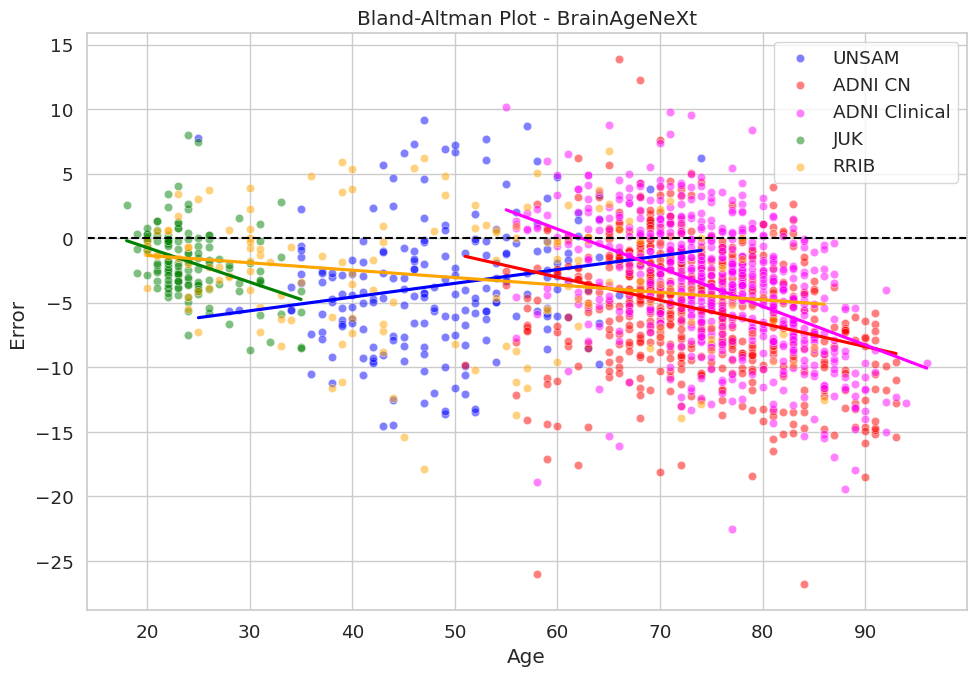

In [328]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid", font_scale=1.2)

# --- Scatter + línea de tendencia para cada cohorte ---
# UNSAM
sns.scatterplot(data=BAN_UNSAM, x='Edad', y='Error', color='blue', label='UNSAM', alpha=0.5)
sns.regplot(data=BAN_UNSAM, x='Edad', y='Error', scatter=False, color='blue', ci=None)

# ADNI CN
sns.scatterplot(data=BAN_ADNI[BAN_ADNI['Group'] == 'CN'], x='Age', y='Error', color='red', label='ADNI CN', alpha=0.5)
sns.regplot(data=BAN_ADNI[BAN_ADNI['Group'] == 'CN'], x='Age', y='Error', scatter=False, color='red', ci=None)

# ADNI Clinical
sns.scatterplot(data=BAN_ADNI[BAN_ADNI['Group'] != 'CN'], x='Age', y='Error', color='magenta', label='ADNI Clinical', alpha=0.5)
sns.regplot(data=BAN_ADNI[BAN_ADNI['Group'] != 'CN'], x='Age', y='Error', scatter=False, color='magenta', ci=None)

# JUK
sns.scatterplot(data=BAN_JUK, x='age', y='Error', color='green', label='JUK', alpha=0.5)
sns.regplot(data=BAN_JUK, x='age', y='Error', scatter=False, color='green', ci=None)

# RRIB
sns.scatterplot(data=BAN_RRIB, x='age', y='Error', color='orange', label='RRIB', alpha=0.5)
sns.regplot(data=BAN_RRIB, x='age', y='Error', scatter=False, color='orange', ci=None)

# --- Líneas horizontales comunes (si querés una sola media de referencia) ---
plt.axhline(0, color='black', linestyle='--')

plt.title('Bland-Altman Plot - BrainAgeNeXt')
plt.xlabel('Age')
plt.ylabel('Error ')
plt.grid(True)
plt.tight_layout()
plt.show()



DeepBrainNet

In [329]:
#UNSAM-----------------------------------------------------------------------
DBN_UNSAM['mean']=DBN_UNSAM['Edad']+DBN_UNSAM['Pred_Age']
DBN_UNSAM['mean']=DBN_UNSAM['mean']/2

mean_diff_DBNUNSAM=np.mean(DBN_UNSAM['Error'])
std_diff_DBNUNSAM=np.std(DBN_UNSAM['Error'])

#intervalo de confianza del 95%
upper_limit_DBNUNSAM = mean_diff_DBNUNSAM + 1.96 * std_diff_DBNUNSAM
lower_limit_DBNUNSAM = mean_diff_DBNUNSAM - 1.96 * std_diff_DBNUNSAM

#ADNI CN-----------------------------------------------------------------------
DBN_ADNI['mean']=DBN_ADNI['Age']+DBN_ADNI['Pred_Age']
DBN_ADNI['mean']=DBN_ADNI['mean']/2

#media y desviación estándar de las diferencias
mean_diff_control_DBNADNI=np.mean(DBN_ADNI[DBN_ADNI['Group']=='CN']['Error'])
std_diff_control_DBNADNI=np.std(DBN_ADNI[DBN_ADNI['Group']=='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_control_DBNADNI = mean_diff_control_DBNADNI + 1.96 * std_diff_control_DBNADNI
lower_limit_control_DBNADNI = mean_diff_control_DBNADNI - 1.96 * std_diff_control_DBNADNI

#ADNI clinical-----------------------------------------------------------------------

#media y desviación estándar de las diferencias
mean_diff_clinical_DBNADNI=np.mean(DBN_ADNI[DBN_ADNI['Group']!='CN']['Error'])
std_diff_clinical_DBNADNI=np.std(DBN_ADNI[DBN_ADNI['Group']!='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_clinical_DBNADNI = mean_diff_clinical_DBNADNI + 1.96 * std_diff_clinical_DBNADNI
lower_limit_clinical_DBNADNI = mean_diff_clinical_DBNADNI - 1.96 * std_diff_clinical_DBNADNI

#JUK----------------------------------------------------------------
DBN_JUK['mean']=DBN_JUK['age']+DBN_JUK['Pred_Age']
DBN_JUK['mean']=DBN_JUK['mean']/2

mean_diff_DBNJUK=np.mean(DBN_JUK['Error'])
std_diff_DBNJUK=np.std(DBN_JUK['Error'])

#intervalo de confianza del 95%
upper_limit_DBNJUK = mean_diff_DBNJUK + 1.96 * std_diff_DBNJUK
lower_limit_DBNJUK = mean_diff_DBNJUK - 1.96 * std_diff_DBNJUK

#RRIB-----------------------------------------------------------------------
DBN_RRIB['mean']=DBN_RRIB['age']+DBN_RRIB['Pred_Age']
DBN_RRIB['mean']=DBN_RRIB['mean']/2

mean_diff_DBNRRIB=np.mean(DBN_RRIB['Error'])
std_diff_DBNRRIB=np.std(DBN_RRIB['Error'])

#intervalo de confianza del 95%
upper_limit_DBNRRIB = mean_diff_DBNRRIB + 1.96 * std_diff_DBNRRIB
lower_limit_DBNRRIB = mean_diff_DBNRRIB - 1.96 * std_diff_DBNRRIB

In [330]:
# Eliminar nulos
DBN_UNSAM = DBN_UNSAM.dropna(subset=['Error', 'mean'])
DBN_ADNI = DBN_ADNI.dropna(subset=['Error', 'mean'])
DBN_JUK = DBN_JUK.dropna(subset=['Error', 'mean'])
DBN_RRIB = DBN_RRIB.dropna(subset=['Error', 'mean'])

# Regressión DBN_UNSAM
slope_DBNUNSAM, intercept_DBNUNSAM = np.polyfit(DBN_UNSAM['Edad'], DBN_UNSAM['Error'], 1)
tendencia_DBNUNSAM = slope_DBNUNSAM * DBN_UNSAM['Edad'] + intercept_DBNUNSAM

# Regressión DBN_ADNICN
slope_DBNADNICN, intercept_DBNADNICN = np.polyfit(DBN_ADNI[DBN_ADNI['Group']=='CN']['Age'], DBN_ADNI[DBN_ADNI['Group']=='CN']['Error'], 1)
tendencia_DBNADNICN = slope_DBNADNICN * DBN_ADNI[DBN_ADNI['Group']=='CN']['Age'] + intercept_DBNADNICN

# Regressión DBN_ADNIcli
slope_DBNADNIcli, intercept_DBNADNIcli = np.polyfit(DBN_ADNI[DBN_ADNI['Group']!='CN']['Age'], DBN_ADNI[DBN_ADNI['Group']!='CN']['Error'], 1)
tendencia_DBNADNIcli = slope_DBNADNIcli * DBN_ADNI[DBN_ADNI['Group']!='CN']['Age'] + intercept_DBNADNIcli

# Regressión DBN_JUK
slope_DBNJUK, intercept_DBNJUK = np.polyfit(DBN_JUK['age'], DBN_JUK['Error'], 1)
tendencia_DBNJUK = slope_DBNJUK * DBN_JUK['age'] + intercept_DBNJUK

# Regressión DBN_RRIB
slope_DBNRRIB, intercept_DBNRRIB = np.polyfit(DBN_RRIB['age'], DBN_RRIB['Error'], 1)
tendencia_DBNRRIB = slope_DBNRRIB * DBN_RRIB['age'] + intercept_DBNRRIB

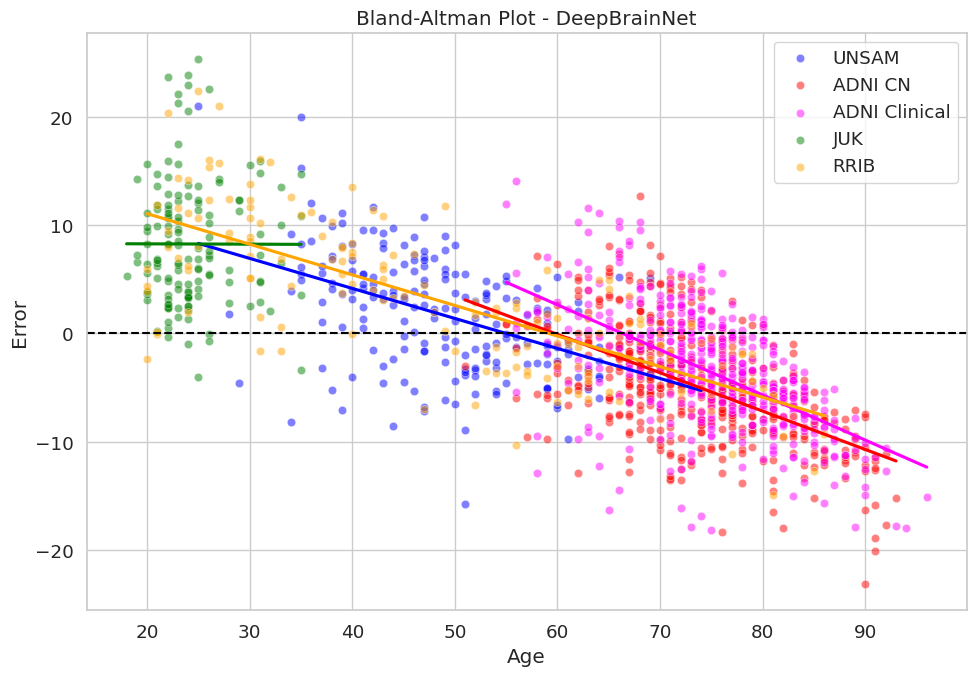

In [331]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid", font_scale=1.2)
DBN_ADNI=DBN_ADNI[DBN_ADNI['Pred_Age']<150]

# --- Scatter + línea de tendencia para cada cohorte ---
# UNSAM
sns.scatterplot(data=DBN_UNSAM, x='Edad', y='Error', color='blue', label='UNSAM', alpha=0.5)
sns.regplot(data=DBN_UNSAM, x='Edad', y='Error', scatter=False, color='blue', ci=None)

# ADNI CN
sns.scatterplot(data=DBN_ADNI[DBN_ADNI['Group'] == 'CN'], x='Age', y='Error', color='red', label='ADNI CN', alpha=0.5)
sns.regplot(data=DBN_ADNI[DBN_ADNI['Group'] == 'CN'], x='Age', y='Error', scatter=False, color='red', ci=None)

# ADNI Clinical
sns.scatterplot(data=DBN_ADNI[DBN_ADNI['Group'] != 'CN'], x='Age', y='Error', color='magenta', label='ADNI Clinical', alpha=0.5)
sns.regplot(data=DBN_ADNI[DBN_ADNI['Group'] != 'CN'], x='Age', y='Error', scatter=False, color='magenta', ci=None)

# JUK
sns.scatterplot(data=DBN_JUK, x='age', y='Error', color='green', label='JUK', alpha=0.5)
sns.regplot(data=DBN_JUK, x='age', y='Error', scatter=False, color='green', ci=None)

# RRIB
sns.scatterplot(data=DBN_RRIB, x='age', y='Error', color='orange', label='RRIB', alpha=0.5)
sns.regplot(data=DBN_RRIB, x='age', y='Error', scatter=False, color='orange', ci=None)

# --- Líneas horizontales comunes (si querés una sola media de referencia) ---
plt.axhline(0, color='black', linestyle='--')

plt.title('Bland-Altman Plot - DeepBrainNet')
plt.xlabel('Age')
plt.ylabel('Error')
plt.grid(True)
plt.tight_layout()
plt.show()


pyment

In [332]:
#UNSAM-----------------------------------------------------------------------
pyment_UNSAM['mean']=pyment_UNSAM['Edad']+pyment_UNSAM['prediction']
pyment_UNSAM['mean']=pyment_UNSAM['mean']/2

mean_diff_pymentUNSAM=np.mean(pyment_UNSAM['Error'])
std_diff_pymentUNSAM=np.std(pyment_UNSAM['Error'])

#intervalo de confianza del 95%
upper_limit_pymentUNSAM = mean_diff_pymentUNSAM + 1.96 * std_diff_pymentUNSAM
lower_limit_pymentUNSAM = mean_diff_pymentUNSAM - 1.96 * std_diff_pymentUNSAM

#ADNI CN-----------------------------------------------------------------------
pyment_ADNI['mean']=pyment_ADNI['Age']+pyment_ADNI['prediction']
pyment_ADNI['mean']=pyment_ADNI['mean']/2

#media y desviación estándar de las diferencias
mean_diff_control_pymentADNI=np.mean(pyment_ADNI[pyment_ADNI['Group']=='CN']['Error'])
std_diff_control_pymentADNI=np.std(pyment_ADNI[pyment_ADNI['Group']=='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_control_pymentADNI = mean_diff_control_pymentADNI + 1.96 * std_diff_control_pymentADNI
lower_limit_control_pymentADNI = mean_diff_control_pymentADNI - 1.96 * std_diff_control_pymentADNI

#ADNI clinical-----------------------------------------------------------------------
#media y desviación estándar de las diferencias
mean_diff_clinical_pymentADNI=np.mean(pyment_ADNI[pyment_ADNI['Group']!='CN']['Error'])
std_diff_clinical_pymentADNI=np.std(pyment_ADNI[pyment_ADNI['Group']!='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_clinical_pymentADNI = mean_diff_clinical_pymentADNI + 1.96 * std_diff_clinical_pymentADNI
lower_limit_clinical_pymentADNI = mean_diff_clinical_pymentADNI - 1.96 * std_diff_clinical_pymentADNI

#JUK-----------------------------------------------------------------------
pyment_JUK['mean']=pyment_JUK['age']+pyment_JUK['prediction']
pyment_JUK['mean']=pyment_JUK['mean']/2

mean_diff_pymentJUK=np.mean(pyment_JUK['Error'])
std_diff_pymentJUK=np.std(pyment_JUK['Error'])

#intervalo de confianza del 95%
upper_limit_pymentJUK = mean_diff_pymentJUK + 1.96 * std_diff_pymentJUK
lower_limit_pymentJUK = mean_diff_pymentJUK - 1.96 * std_diff_pymentJUK

#RRIB-----------------------------------------------------------------------
pyment_RRIB['mean']=pyment_RRIB['age']+pyment_RRIB['prediction']
pyment_RRIB['mean']=pyment_RRIB['mean']/2

mean_diff_pymentRRIB=np.mean(pyment_RRIB['Error'])
std_diff_pymentRRIB=np.std(pyment_RRIB['Error'])

#intervalo de confianza del 95%
upper_limit_pymentRRIB = mean_diff_pymentRRIB + 1.96 * std_diff_pymentRRIB
lower_limit_pymentRRIB = mean_diff_pymentRRIB - 1.96 * std_diff_pymentRRIB

In [333]:
#eliminar nulos
pyment_UNSAM = pyment_UNSAM.dropna(subset=['Error', 'mean'])
pyment_ADNI = pyment_ADNI.dropna(subset=['Error', 'mean'])
pyment_JUK = pyment_JUK.dropna(subset=['Error', 'mean'])
pyment_RRIB = pyment_RRIB.dropna(subset=['Error', 'mean'])

# Regressión pyment_UNSAM
slope_pymentUNSAM, intercept_pymentUNSAM = np.polyfit(pyment_UNSAM['Edad'], pyment_UNSAM['Error'], 1)
tendencia_pymentUNSAM = slope_pymentUNSAM * pyment_UNSAM['Edad'] + intercept_pymentUNSAM

# Regressión pyment_ADNICN
slope_pymentADNICN, intercept_pymentADNICN = np.polyfit(pyment_ADNI[pyment_ADNI['Group']=='CN']['Age'], pyment_ADNI[pyment_ADNI['Group']=='CN']['Error'], 1)
tendencia_pymentADNICN = slope_pymentADNICN * pyment_ADNI[pyment_ADNI['Group']=='CN']['Age'] + intercept_pymentADNICN

# Regressión pyment_ADNIcli
slope_pymentADNIcli, intercept_pymentADNIcli = np.polyfit(pyment_ADNI[pyment_ADNI['Group']!='CN']['Age'], pyment_ADNI[pyment_ADNI['Group']!='CN']['Error'], 1)
tendencia_pymentADNIcli = slope_pymentADNIcli * pyment_ADNI[pyment_ADNI['Group']!='CN']['Age'] + intercept_pymentADNIcli

# Regressión pyment_JUK
slope_pymentJUK, intercept_pymentJUK = np.polyfit(pyment_JUK['age'], pyment_JUK['Error'], 1)
tendencia_pymentJUK = slope_pymentJUK * pyment_JUK['age'] + intercept_pymentJUK

# Regressión pyment_RRIB
slope_pymentRRIB, intercept_pymentRRIB = np.polyfit(pyment_RRIB['age'], pyment_RRIB['Error'], 1)
tendencia_pymentRRIB = slope_pymentRRIB * pyment_RRIB['age'] + intercept_pymentRRIB

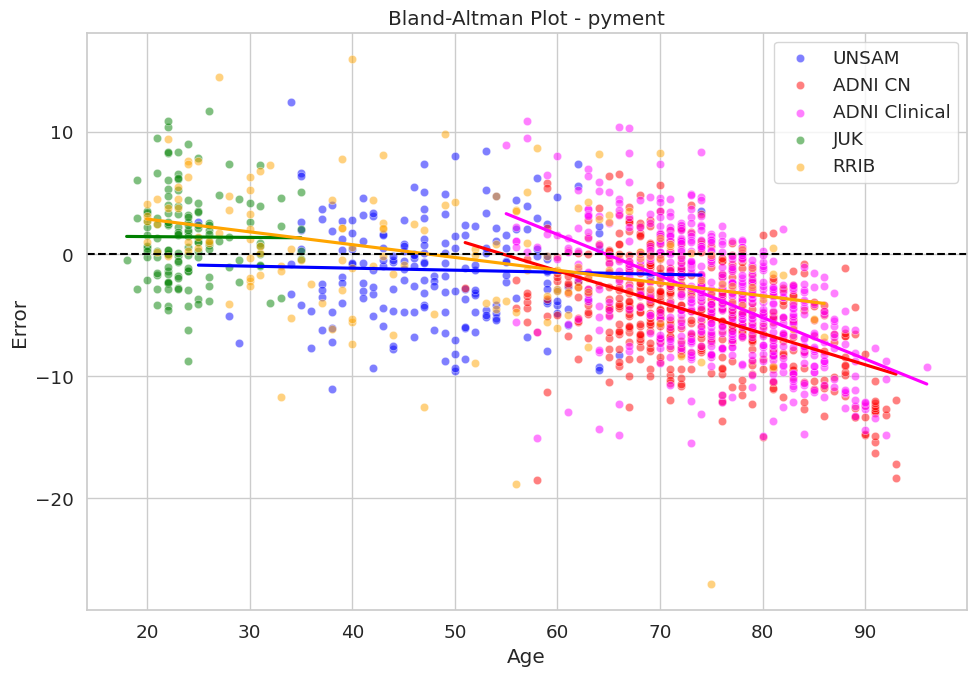

In [334]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid", font_scale=1.2)

# --- Scatter + línea de tendencia para cada cohorte ---
# UNSAM
sns.scatterplot(data=pyment_UNSAM, x='Edad', y='Error', color='blue', label='UNSAM', alpha=0.5)
sns.regplot(data=pyment_UNSAM, x='Edad', y='Error', scatter=False, color='blue', ci=None)

# ADNI CN
sns.scatterplot(data=pyment_ADNI[pyment_ADNI['Group'] == 'CN'], x='Age', y='Error', color='red', label='ADNI CN', alpha=0.5)
sns.regplot(data=pyment_ADNI[pyment_ADNI['Group'] == 'CN'], x='Age', y='Error', scatter=False, color='red', ci=None)

# ADNI Clinical
sns.scatterplot(data=pyment_ADNI[pyment_ADNI['Group'] != 'CN'], x='Age', y='Error', color='magenta', label='ADNI Clinical', alpha=0.5)
sns.regplot(data=pyment_ADNI[pyment_ADNI['Group'] != 'CN'], x='Age', y='Error', scatter=False, color='magenta', ci=None)

# JUK
sns.scatterplot(data=pyment_JUK, x='age', y='Error', color='green', label='JUK', alpha=0.5)
sns.regplot(data=pyment_JUK, x='age', y='Error', scatter=False, color='green', ci=None)

# RRIB
sns.scatterplot(data=pyment_RRIB, x='age', y='Error', color='orange', label='RRIB', alpha=0.5)
sns.regplot(data=pyment_RRIB, x='age', y='Error', scatter=False, color='orange', ci=None)

# --- Líneas horizontales comunes (si querés una sola media de referencia) ---
plt.axhline(0, color='black', linestyle='--')

plt.title('Bland-Altman Plot - pyment')
plt.xlabel('Age')
plt.ylabel('Error')
plt.grid(True)
plt.tight_layout()
plt.show()

ENIGMA

In [335]:
#UNSAM-----------------------------------------------------------------------
ENIGMA_UNSAM['mean']=ENIGMA_UNSAM['Edad']+ENIGMA_UNSAM['prediction']
ENIGMA_UNSAM['mean']=ENIGMA_UNSAM['mean']/2
mean_diff_ENIGMAUNSAM=np.mean(ENIGMA_UNSAM['Error'])
std_diff_ENIGMAUNSAM=np.std(ENIGMA_UNSAM['Error'])

#intervalo de confianza del 95%
upper_limit_ENIGMAUNSAM = mean_diff_ENIGMAUNSAM + 1.96 * std_diff_ENIGMAUNSAM
lower_limit_ENIGMAUNSAM = mean_diff_ENIGMAUNSAM - 1.96 * std_diff_ENIGMAUNSAM

#ADNI CN-----------------------------------------------------------------------
ENIGMA_ADNI['mean']=ENIGMA_ADNI['Age']+ENIGMA_ADNI['prediction']
ENIGMA_ADNI['mean']=ENIGMA_ADNI['mean']/2

#media y desviación estándar de las diferencias
mean_diff_control_ENIGMAADNI=np.mean(ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['Error'])
std_diff_control_ENIGMAADNI=np.std(ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_control_ENIGMAADNI = mean_diff_control_ENIGMAADNI + 1.96 * std_diff_control_ENIGMAADNI
lower_limit_control_ENIGMAADNI = mean_diff_control_ENIGMAADNI - 1.96 * std_diff_control_ENIGMAADNI

#ADNI clinical-----------------------------------------------------------------------
#media y desviación estándar de las diferencias
mean_diff_clinical_ENIGMAADNI=np.mean(ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['Error'])
std_diff_clinical_ENIGMAADNI=np.std(ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_clinical_ENIGMAADNI = mean_diff_clinical_ENIGMAADNI + 1.96 * std_diff_clinical_ENIGMAADNI
lower_limit_clinical_ENIGMAADNI = mean_diff_clinical_ENIGMAADNI - 1.96 * std_diff_clinical_ENIGMAADNI

#JUK-----------------------------------------------------------------------
ENIGMA_JUK['mean']=ENIGMA_JUK['age']+ENIGMA_JUK['prediction']
ENIGMA_JUK['mean']=ENIGMA_JUK['mean']/2

mean_diff_ENIGMAJUK=np.mean(ENIGMA_JUK['Error'])
std_diff_ENIGMAJUK=np.std(ENIGMA_JUK['Error'])

#intervalo de confianza del 95%
upper_limit_ENIGMAJUK = mean_diff_ENIGMAJUK + 1.96 * std_diff_ENIGMAJUK
lower_limit_ENIGMAJUK = mean_diff_ENIGMAJUK - 1.96 * std_diff_ENIGMAJUK

#RRIB-----------------------------------------------------------------------
ENIGMA_RRIB['mean']=ENIGMA_RRIB['age']+ENIGMA_RRIB['prediction']
ENIGMA_RRIB['mean']=ENIGMA_RRIB['mean']/2

mean_diff_ENIGMARRIB=np.mean(ENIGMA_RRIB['Error'])
std_diff_ENIGMARRIB=np.std(ENIGMA_RRIB['Error'])

#intervalo de confianza del 95%
upper_limit_ENIGMARRIB = mean_diff_ENIGMARRIB + 1.96 * std_diff_ENIGMARRIB
lower_limit_ENIGMARRIB = mean_diff_ENIGMARRIB - 1.96 * std_diff_ENIGMARRIB  



In [336]:
#eliminar nulos
ENIGMA_UNSAM = ENIGMA_UNSAM.dropna(subset=['Error', 'mean'])
ENIGMA_ADNI = ENIGMA_ADNI.dropna(subset=['Error', 'mean'])
#ENIGMA_JUK = ENIGMA_JUK.dropna(subset=['Error', 'mean'])
#ENIGMA_RRIB = ENIGMA_RRIB.dropna(subset=['Error', 'mean'])

# Regressión ENIGMA_UNSAM
slope_ENIGMAUNSAM, intercept_ENIGMAUNSAM = np.polyfit(ENIGMA_UNSAM['Edad'], ENIGMA_UNSAM['Error'], 1)
tendencia_ENIGMAUNSAM = slope_ENIGMAUNSAM * ENIGMA_UNSAM['Edad'] + intercept_ENIGMAUNSAM

# Regressión ENIGMA_ADNICN
slope_ENIGMAADNICN, intercept_ENIGMAADNICN = np.polyfit(ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['Age'], ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['Error'], 1)
tendencia_ENIGMAADNICN = slope_ENIGMAADNICN * ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['Age'] + intercept_ENIGMAADNICN

# Regressión ENIGMA_ADNIcli
slope_ENIGMAADNIcli, intercept_ENIGMAADNIcli = np.polyfit(ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['Age'], ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['Error'], 1)
tendencia_ENIGMAADNIcli = slope_ENIGMAADNIcli * ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['Age'] + intercept_ENIGMAADNIcli

# Regressión ENIGMA_JUK
slope_ENIGMAJUK, intercept_ENIGMAJUK = np.polyfit(ENIGMA_JUK['age'], ENIGMA_JUK['Error'], 1)
tendencia_ENIGMAJUK = slope_ENIGMAJUK * ENIGMA_JUK['age'] + intercept_ENIGMAJUK

# Regressión ENIGMA_RRIB
slope_ENIGMARRIB, intercept_ENIGMARRIB = np.polyfit(ENIGMA_RRIB['age'], ENIGMA_RRIB['Error'], 1)
tendencia_ENIGMARRIB = slope_ENIGMARRIB * ENIGMA_RRIB['age'] + intercept_ENIGMARRIB


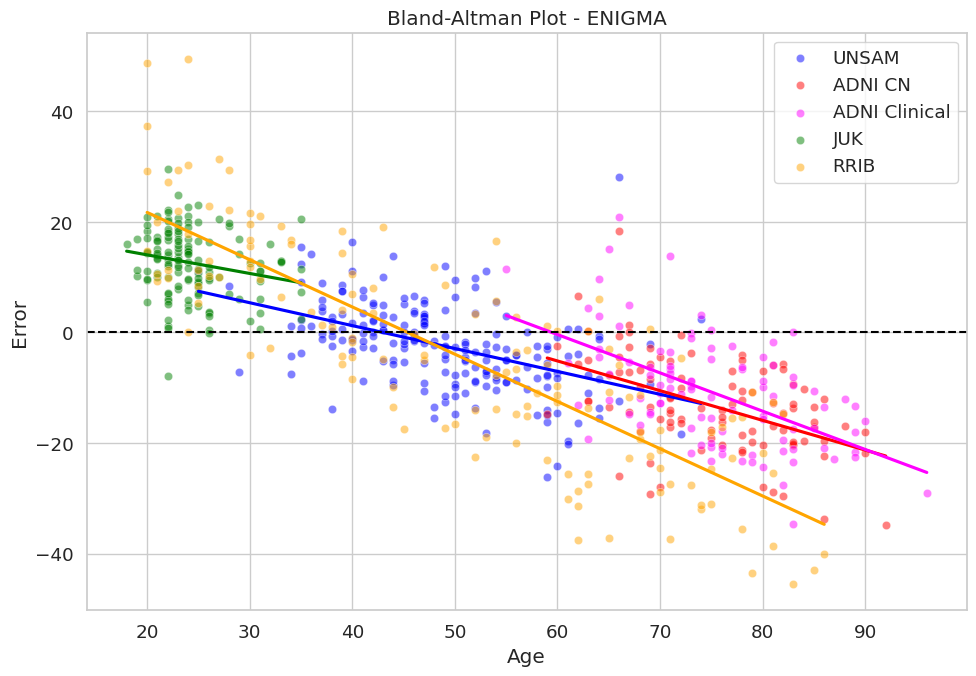

In [337]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid", font_scale=1.2)

# --- Scatter + línea de tendencia para cada cohorte ---
# UNSAM
sns.scatterplot(data=ENIGMA_UNSAM, x='Edad', y='Error', color='blue', label='UNSAM', alpha=0.5)
sns.regplot(data=ENIGMA_UNSAM, x='Edad', y='Error', scatter=False, color='blue', ci=None)

# ADNI CN
sns.scatterplot(data=ENIGMA_ADNI[ENIGMA_ADNI['Group'] == 'CN'], x='Age', y='Error', color='red', label='ADNI CN', alpha=0.5)
sns.regplot(data=ENIGMA_ADNI[ENIGMA_ADNI['Group'] == 'CN'], x='Age', y='Error', scatter=False, color='red', ci=None)

# ADNI Clinical
sns.scatterplot(data=ENIGMA_ADNI[ENIGMA_ADNI['Group'] != 'CN'], x='Age', y='Error', color='magenta', label='ADNI Clinical', alpha=0.5)
sns.regplot(data=ENIGMA_ADNI[ENIGMA_ADNI['Group'] != 'CN'], x='Age', y='Error', scatter=False, color='magenta', ci=None)

# JUK
sns.scatterplot(data=ENIGMA_JUK, x='age', y='Error', color='green', label='JUK', alpha=0.5)
sns.regplot(data=ENIGMA_JUK, x='age', y='Error', scatter=False, color='green', ci=None)

# RRIB
sns.scatterplot(data=ENIGMA_RRIB, x='age', y='Error', color='orange', label='RRIB', alpha=0.5)
sns.regplot(data=ENIGMA_RRIB, x='age', y='Error', scatter=False, color='orange', ci=None)

# --- Líneas horizontales comunes (si querés una sola media de referencia) ---
plt.axhline(0, color='black', linestyle='--')

plt.title('Bland-Altman Plot - ENIGMA')
plt.xlabel('Age')
plt.ylabel('Error')
plt.grid(True)
plt.tight_layout()
plt.show()


In [338]:
BAN_UNSAM['Dataset']='UNSAM'
BAN_ADNI['Dataset']='ADNI'
BAN_JUK['Dataset']='JUK'
BAN_RRIB['Dataset']='RRIB'
BAN_UNSAM.rename(columns={'Edad':'Age'}, inplace=True)
BAN_JUK.rename(columns={'age':'Age'}, inplace=True)
BAN_RRIB.rename(columns={'age':'Age'}, inplace=True)
BAN_all = pd.concat([BAN_UNSAM, BAN_ADNI, BAN_JUK, BAN_RRIB], ignore_index=True)
DBN_UNSAM['Dataset']='UNSAM'
DBN_ADNI['Dataset']='ADNI'
DBN_JUK['Dataset']='JUK'
DBN_RRIB['Dataset']='RRIB'
DBN_UNSAM.rename(columns={'Edad':'Age'}, inplace=True)
DBN_JUK.rename(columns={'age':'Age'}, inplace=True)
DBN_RRIB.rename(columns={'age':'Age'}, inplace=True)
DBN_all = pd.concat([DBN_UNSAM, DBN_ADNI, DBN_JUK, DBN_RRIB], ignore_index=True)
pyment_UNSAM['Dataset']='UNSAM'
pyment_ADNI['Dataset']='ADNI'
pyment_JUK['Dataset']='JUK'
pyment_RRIB['Dataset']='RRIB'
pyment_UNSAM.rename(columns={'Edad':'Age'}, inplace=True)
pyment_JUK.rename(columns={'age':'Age'}, inplace=True)
pyment_RRIB.rename(columns={'age':'Age'}, inplace=True)
pyment_all = pd.concat([pyment_UNSAM, pyment_ADNI, pyment_JUK, pyment_RRIB], ignore_index=True)
ENIGMA_UNSAM['Dataset']='UNSAM'
ENIGMA_ADNI['Dataset']='ADNI'
ENIGMA_JUK['Dataset']='JUK'
ENIGMA_RRIB['Dataset']='RRIB'
ENIGMA_UNSAM.rename(columns={'Edad':'Age'}, inplace=True)
ENIGMA_JUK.rename(columns={'age':'Age'}, inplace=True)
ENIGMA_RRIB.rename(columns={'age':'Age'}, inplace=True)
ENIGMA_all = pd.concat([ENIGMA_UNSAM, ENIGMA_ADNI, ENIGMA_JUK, ENIGMA_RRIB], ignore_index=True)

In [339]:
#BAN 
mean_diff_BAN=np.mean(BAN_all['Error'])
std_diff_BAN=np.std(BAN_all['Error'])
#intervalo de confianza del 95%
upper_limit_BAN = mean_diff_BAN + 1.96 * std_diff_BAN
lower_limit_BAN = mean_diff_BAN - 1.96 * std_diff_BAN

#DBN
mean_diff_DBN=np.mean(DBN_all['Error'])
std_diff_DBN=np.std(DBN_all['Error'])
#intervalo de confianza del 95%
upper_limit_DBN = mean_diff_DBN + 1.96 * std_diff_DBN
lower_limit_DBN = mean_diff_DBN - 1.96 * std_diff_DBN

#pyment
mean_diff_pyment=np.mean(pyment_all['Error'])
std_diff_pyment=np.std(pyment_all['Error'])
#intervalo de confianza del 95%
upper_limit_pyment = mean_diff_pyment + 1.96 * std_diff_pyment
lower_limit_pyment = mean_diff_pyment - 1.96 * std_diff_pyment

#ENIGMA
mean_diff_ENIGMA=np.mean(ENIGMA_all['Error'])
std_diff_ENIGMA=np.std(ENIGMA_all['Error'])
#intervalo de confianza del 95%
upper_limit_ENIGMA = mean_diff_ENIGMA + 1.96 * std_diff_ENIGMA
lower_limit_ENIGMA = mean_diff_ENIGMA - 1.96 * std_diff_ENIGMA

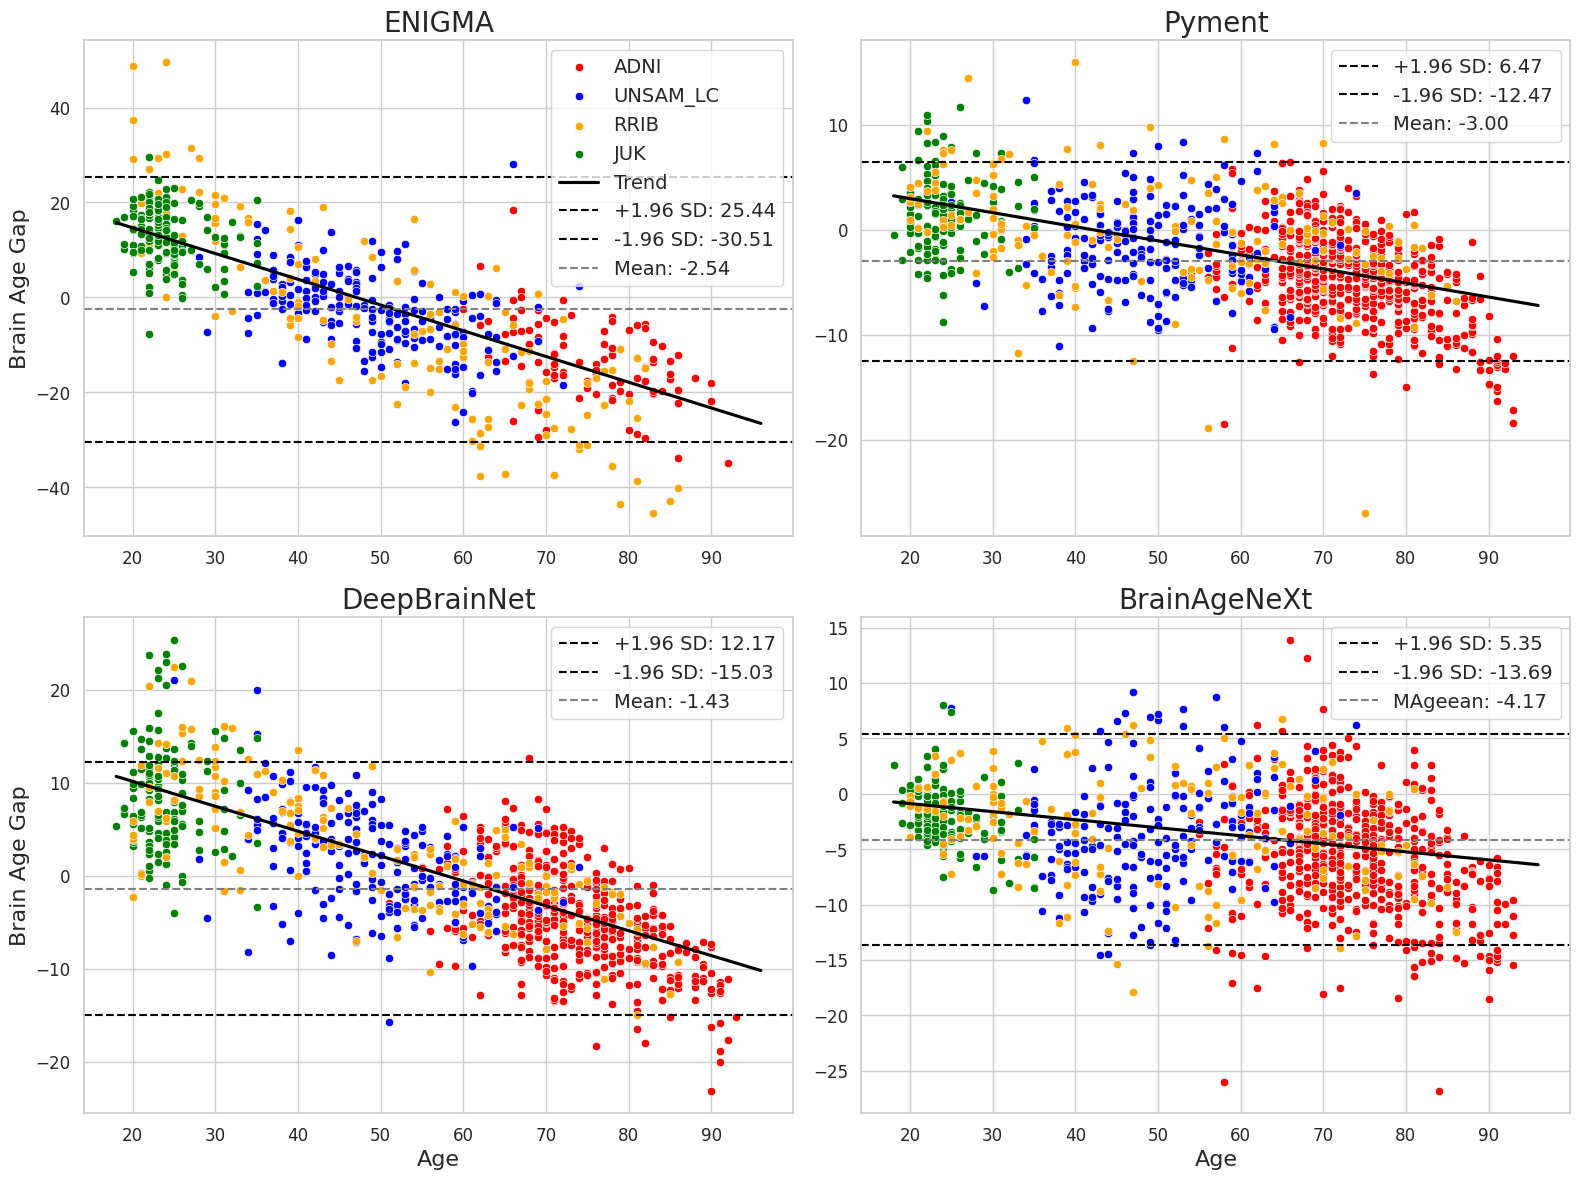

In [340]:
sns.set(style="whitegrid", font_scale=1.1)

# Crear figura y ejes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# ---- Configurar cada subplot ----

# 1. BrainAgeNeXt
axes[3].set_title('BrainAgeNeXt',fontsize=20)
sns.scatterplot(ax=axes[3], data=BAN_ADNI[BAN_ADNI['Group'] == 'CN'], x='Age', y='Error', color='red')
sns.scatterplot(ax=axes[3], data=BAN_UNSAM, x='Age', y='Error', color='blue')
sns.regplot(ax=axes[3], data=BAN_all, x='Age', y='Error', scatter=False, color='black', ci=None)
sns.scatterplot(ax=axes[3], data=BAN_JUK, x='Age', y='Error', color='green')
sns.scatterplot(ax=axes[3], data=BAN_RRIB, x='Age', y='Error', color='orange')
#grafico de upper y lower limit
axes[3].axhline(upper_limit_BAN, color='black', linestyle='--',label=f'+1.96 SD: {upper_limit_BAN:.2f}')
axes[3].axhline(lower_limit_BAN, color='black', linestyle='--', label=f'-1.96 SD: {lower_limit_BAN:.2f}')
axes[3].axhline(mean_diff_BAN, color='gray', linestyle='--', label=f'MAgeean: {mean_diff_BAN:.2f}')
axes[3].set_xlabel('Age',fontsize=16)
axes[3].set_ylabel('')
axes[3].legend(fontsize=14)

# 2. DeepBrainNet
axes[2].set_title('DeepBrainNet',fontsize=20)
sns.scatterplot(ax=axes[2], data=DBN_ADNI[DBN_ADNI['Group'] == 'CN'], x='Age', y='Error', color='red')
sns.scatterplot(ax=axes[2], data=DBN_UNSAM, x='Age', y='Error', color='blue')
sns.regplot(ax=axes[2], data=DBN_all, x='Age', y='Error', scatter=False, color='black', ci=None)
sns.scatterplot(ax=axes[2], data=DBN_JUK, x='Age', y='Error', color='green')
sns.scatterplot(ax=axes[2], data=DBN_RRIB, x='Age', y='Error', color='orange')
axes[2].axhline(upper_limit_DBN, color='black', linestyle='--', label=f'+1.96 SD: {upper_limit_DBN:.2f}')
axes[2].axhline(lower_limit_DBN, color='black', linestyle='--', label=f'-1.96 SD: {lower_limit_DBN:.2f}')
axes[2].axhline(mean_diff_DBN, color='gray', linestyle='--', label=f'Mean: {mean_diff_DBN:.2f}')
axes[2].set_xlabel('Age',fontsize=16)
axes[2].set_ylabel('Brain Age Gap',fontsize=16)
axes[2].legend(fontsize=14)

# 3. pyment
axes[1].set_title('Pyment',fontsize=20)
sns.scatterplot(ax=axes[1], data=pyment_ADNI[pyment_ADNI['Group'] == 'CN'], x='Age', y='Error', color='red')
sns.scatterplot(ax=axes[1], data=pyment_UNSAM, x='Age', y='Error', color='blue')
sns.regplot(ax=axes[1], data=pyment_all, x='Age', y='Error', scatter=False, color='black', ci=None)
sns.scatterplot(ax=axes[1], data=pyment_JUK, x='Age', y='Error', color='green')
sns.scatterplot(ax=axes[1], data=pyment_RRIB, x='Age', y='Error', color='orange')
axes[1].axhline(upper_limit_pyment, color='black', linestyle='--', label=f'+1.96 SD: {upper_limit_pyment:.2f}')
axes[1].axhline(lower_limit_pyment, color='black', linestyle='--', label=f'-1.96 SD: {lower_limit_pyment:.2f}')
axes[1].axhline(mean_diff_pyment, color='gray', linestyle='--', label=f'Mean: {mean_diff_pyment:.2f}')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].legend(fontsize=14)

# 4. ENIGMA
axes[0].set_title('ENIGMA',fontsize=20)
sns.scatterplot(ax=axes[0], data=ENIGMA_ADNI[ENIGMA_ADNI['Group'] == 'CN'], x='Age', y='Error', color='red', label='ADNI')
sns.scatterplot(ax=axes[0], data=ENIGMA_UNSAM, x='Age', y='Error', color='blue', label='UNSAM_LC')
sns.scatterplot(ax=axes[0], data=ENIGMA_RRIB, x='Age', y='Error', color='orange', label='RRIB')
sns.scatterplot(ax=axes[0], data=ENIGMA_JUK, x='Age', y='Error', color='green', label='JUK')
sns.regplot(ax=axes[0], data=ENIGMA_all, x='Age', y='Error', scatter=False, color='black', ci=None,label='Trend')
axes[0].axhline(upper_limit_ENIGMA, color='black', linestyle='--', label=f'+1.96 SD: {upper_limit_ENIGMA:.2f}')
axes[0].axhline(lower_limit_ENIGMA, color='black', linestyle='--', label=f'-1.96 SD: {lower_limit_ENIGMA:.2f}')
axes[0].axhline(mean_diff_ENIGMA, color='gray', linestyle='--', label=f'Mean: {mean_diff_ENIGMA:.2f}')
axes[0].set_xlabel('')
axes[0].set_ylabel('Brain Age Gap',fontsize=16)
axes[0].legend(fontsize=14)

# Etiquetas comunes
for ax in axes:
    #ax.set_xlabel('Mean Age')
    #ax.set_ylabel('Error')
    ax.grid(True)

plt.tight_layout()
plt.show()


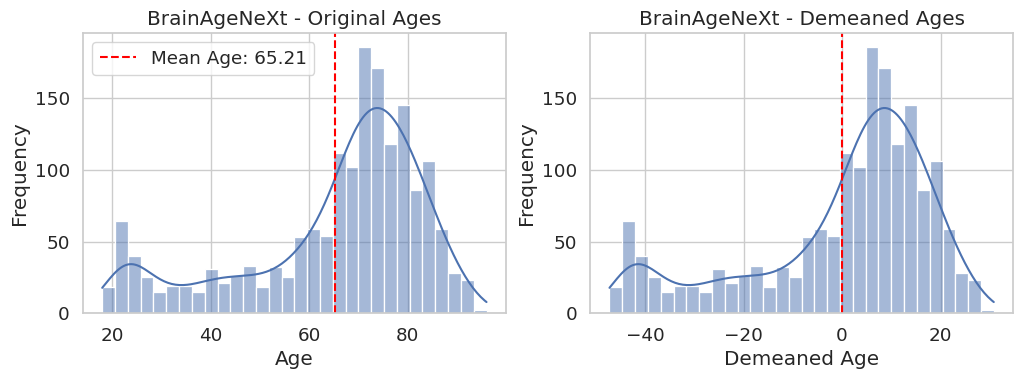

In [341]:
BAN_all=BAN_all[['ID','Age','mean','Error','Dataset','Predicted_Brain_Age']].rename(columns={'Predicted_Brain_Age':'prediction'})
DBN_all=DBN_all[['ID','Age','mean','Error','Dataset','Pred_Age']].rename(columns={'Pred_Age':'prediction'})
pyment_all=pyment_all[['ID','Age','mean','Error','Dataset','prediction']]
ENIGMA_all=ENIGMA_all[['ID','Age','mean','Error','Dataset','prediction']]
BAN_CA_mean=np.mean(BAN_all['Age'])
DBN_CA_mean=np.mean(DBN_all['Age'])
pyment_CA_mean=np.mean(pyment_all['Age'])
ENIGMA_CA_mean=np.mean(ENIGMA_all['Age'])
BAN_all['Corrected_age']=BAN_all['Age']-BAN_CA_mean
DBN_all['Corrected_age']=DBN_all['Age']-DBN_CA_mean
pyment_all['Corrected_age']=pyment_all['Age']-pyment_CA_mean
ENIGMA_all['Corrected_age']=ENIGMA_all['Age']-ENIGMA_CA_mean
#BAN_all['Corrected_age']=BAN_CA_mean-BAN_all['Age']
#DBN_all['Corrected_age']=DBN_CA_mean-DBN_all['Age']
#pyment_all['Corrected_age']=pyment_CA_mean-pyment_all['Age']
#ENIGMA_all['Corrected_age']=ENIGMA_CA_mean-ENIGMA_all['Age']
# Plot histograms with demeaned ages:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid", font_scale=1.2)
# Histograma de edades originales
plt.subplot(2, 2, 1)
sns.histplot(BAN_all['Age'], bins=30, kde=True)
plt.title('BrainAgeNeXt - Original Ages')
plt.xlabel('Age')
plt.ylabel('Frequency') 
plt.axvline(BAN_CA_mean, color='red', linestyle='--', label=f'Mean Age: {BAN_CA_mean:.2f}')
plt.legend()
# Histograma de edades corregidas
plt.subplot(2, 2, 2)
sns.histplot(BAN_all['Corrected_age'], bins=30, kde=True)
plt.title('BrainAgeNeXt - Demeaned Ages')
plt.xlabel('Demeaned Age')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='Mean Demeaned Age: 0.00')

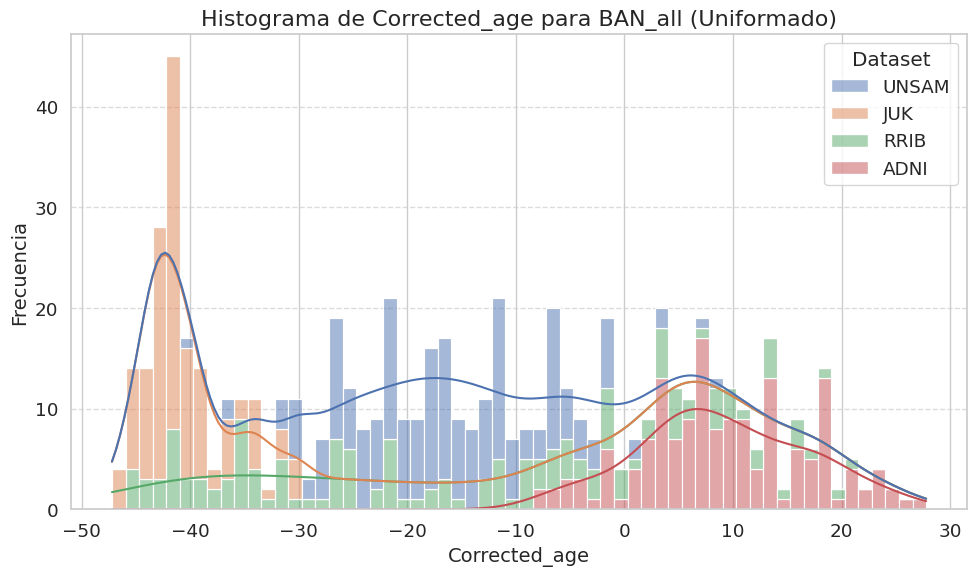

In [342]:
from sklearn.utils import resample

#aca lo que hago es refucir la cantidad de sujetos de ADNI para que sea igual a la de RRIB y tener distribuciones de edades mas uniformes (con enigma no lo hago)
target_size=158 #cantidad de sujetos de la base de datos RRIB

# Filtrar los datos de ADNI
adni_data = BAN_all[BAN_all['Dataset'] == 'ADNI']
# Seleccionar aleatoriamente sujetos de ADNI
adni_sampled = resample(adni_data, n_samples=target_size, random_state=42, replace=False)
# Combinar los datos restantes con los otros datasets
other_data = BAN_all[BAN_all['Dataset'] != 'ADNI']
BAN_all = pd.concat([other_data, adni_sampled], ignore_index=True)

# Filtrar los datos de ADNI
adni_data = pyment_all[pyment_all['Dataset'] == 'ADNI']
# Seleccionar aleatoriamente sujetos de ADNI
adni_sampled = resample(adni_data, n_samples=target_size, random_state=42, replace=False)
# Combinar los datos restantes con los otros datasets
other_data = pyment_all[pyment_all['Dataset'] != 'ADNI']
pyment_all = pd.concat([other_data, adni_sampled], ignore_index=True)

# Filtrar los datos de ADNI
adni_data = DBN_all[DBN_all['Dataset'] == 'ADNI']
# Seleccionar aleatoriamente sujetos de ADNI
adni_sampled = resample(adni_data, n_samples=target_size, random_state=42, replace=False)
# Combinar los datos restantes con los otros datasets
other_data = DBN_all[DBN_all['Dataset'] != 'ADNI']
DBN_all = pd.concat([other_data, adni_sampled], ignore_index=True)


# Verificar el nuevo histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=BAN_all, x='Corrected_age', bins=60, kde=True, hue='Dataset', multiple='stack')
plt.title('Histograma de Corrected_age para BAN_all (Uniformado)', fontsize=16)
plt.xlabel('Corrected_age', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [343]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [344]:
# Si tu dataframe se llama BAN_all:
model = smf.ols("Error ~ Corrected_age * C(Dataset, Treatment(reference='RRIB'))", data=BAN_all).fit()
model_reduced = smf.ols("Error ~ Corrected_age ", data=BAN_all).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Error   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     10.78
Date:                Sat, 20 Sep 2025   Prob (F-statistic):           6.94e-13
Time:                        17:11:03   Log-Likelihood:                -1885.4
No. Observations:                 654   AIC:                             3787.
Df Residuals:                     646   BIC:                             3823.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [345]:
# Tabla de AN(C)OVA 
anova_table = anova_lm(model, typ=2) # typ=2 es lo típico para ANCOVA 

# Compute SS_total
overall_ss_total = anova_table["sum_sq"].sum()
    
# Compute eta squared
anova_table["eta_sq"] = anova_table["sum_sq"] / overall_ss_total
    
# Compute partial eta squared
anova_table["partial_eta_sq"] = anova_table["sum_sq"] / (anova_table["sum_sq"] + anova_table.loc["Residual", "sum_sq"])
    
#anova_table["R2"] = anova_table.rsquared



# R² total 
r2_full = model.rsquared 

# Modelo reducido sin dataset (solo mean) 
r2_reduced = model_reduced.rsquared 

# f² para dataset 
f2_dataset = (r2_full - r2_reduced) / (1 - r2_full)
#0.02= small, 0.15=medium, 0.35=large 
print("f² (Dataset):", f2_dataset)
anova_table

f² (Dataset): 0.0508864652935014


,sum_sq,df,F,PR(>F),eta_sq,partial_eta_sq
"C(Dataset, Treatment(reference='RRIB'))",61.391759,3.0,1.081583,0.356205,0.004728,0.004998
Corrected_age,141.459267,1.0,7.476574,0.006422,0.010893,0.011441
"Corrected_age:C(Dataset, Treatment(reference='RRIB'))",560.569856,3.0,9.875969,0.000002,0.043167,0.043852
Residual,12222.535239,646.0,NaN,NaN,0.941212,0.500000


In [346]:
pyment_all[(pyment_all['mean'] > 20) & (pyment_all['mean'] <= 30)].groupby('Dataset')['Error'].mean()


Dataset
JUK      1.548692
RRIB     1.898292
UNSAM   -3.232691
Name: Error, dtype: float64